In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [40]:
ebt = x / (3.6 * ebr) # time to break with emergency break (s)
sot = (3.6 * so)/x # time for the train to cover stand-off distance (s)
min_h = rt + ebt + sot # minimum headway (s)

## New version

In [60]:
n = 6
l = 20
seats = 40
stand_up = 4
surface = 35

tr = 1 # Reaction time (s)
nbr = 1 # Normal break rate (m/s2)
ebr = 2.5 # Emergency break rate (m/s2)
so = 2 # stand-off distance (m)
x = np.arange(10, 121, 10)   # speed(km/h)

In [61]:
v = x/3.6 # convert km/h to m/s
t0 = so / v   # variation time
t_t = (n*l)/v  # travel time
cv = seats + surface * stand_up  # Capacity vehicle

## Safety regime A

In [87]:
## define the breaking times
# b1 = np.inf
b2 = nbr
# t_b = (v * (b1 - b2)) / (2 * b1 * b2)  # This will fails because b1 = np.inf
# h_min = t0 + t_b + tr + t_t
h_min_regA = t0 + tr + t_t + v / (2 * b2) # remove the breaking time from the computation

In [88]:
c_regA = (3600 * n * cv) / h_min_regA

## Safety regime B

In [89]:
## define the breaking times
b1_regB = ebr
b2_regB = nbr
t_b_regB = (v * (b1_regB - b2_regB)) / (2 * b1_regB * b2_regB)
h_min_regB = t0 + tr + t_t + t_b_regB

In [90]:
c_regB = (3600 * n * cv) / h_min_regB

## Plot

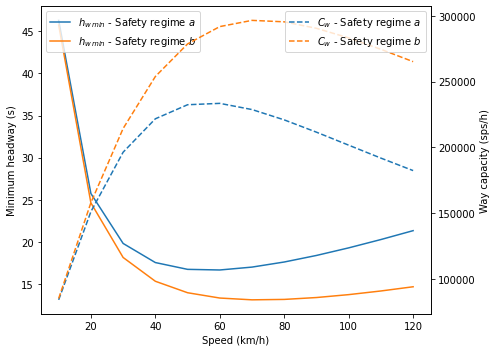

In [94]:
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(x, h_min_regA, label="$h_{w\,min}$ - Safety regime $a$")
ax.plot(x, h_min_regB, label="$h_{w\,min}$ - Safety regime $b$")
ax.set_xlabel("Speed (km/h)")
ax.set_ylabel("Minimum headway (s)")
ax.legend(loc='upper left')

ax2 = ax.twinx() 
ax2.plot(x, c_regA, label="$C_w$ - Safety regime $a$", ls='--')
ax2.plot(x, c_regB, label="$C_w$ - Safety regime $b$", ls='--')
ax2.set_ylabel("Way capacity (sps/h)") 
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig("safety_regime_hmin_capacity.pdf")
plt.show()

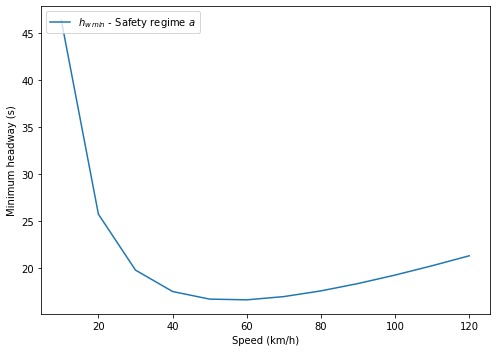

In [95]:
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(x, h_min_regA, label="$h_{w\,min}$ - Safety regime $a$")
ax.set_xlabel("Speed (km/h)")
ax.set_ylabel("Minimum headway (s)")
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig("hmin_regime_a.pdf")
plt.show()

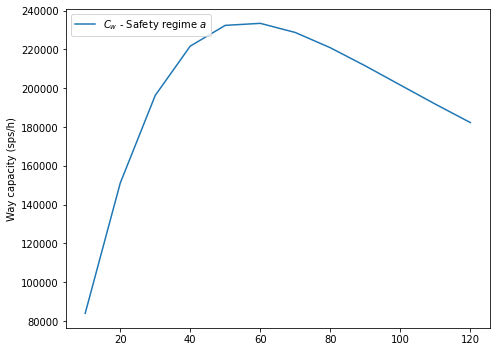

In [97]:
fig,ax = plt.subplots(figsize=(7,5))

ax.plot(x, c_regA, label="$C_w$ - Safety regime $a$", ls='-')

ax.set_ylabel("Way capacity (sps/h)") 
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig("capacity_regime_a.pdf")
plt.show()

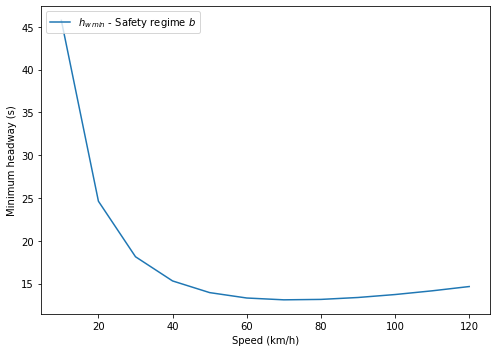

In [98]:
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(x, h_min_regB, label="$h_{w\,min}$ - Safety regime $b$")
ax.set_xlabel("Speed (km/h)")
ax.set_ylabel("Minimum headway (s)")
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig("hmin_regime_b.pdf")
plt.show()

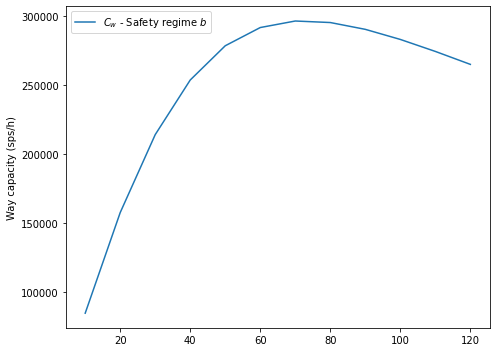

In [99]:
fig,ax = plt.subplots(figsize=(7,5))

ax.plot(x, c_regB, label="$C_w$ - Safety regime $b$", ls='-')

ax.set_ylabel("Way capacity (sps/h)") 
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig("capacity_regime_b.pdf")
plt.show()